# Atividade 3 - Cálculo Numérico
Carlos Bravo - 119136241

As funções chamadas estão implementadas no arquivo _lib.jl_

Algumas questões foram discutidas com:
* David Albuquerque
* Francisco Taam
* Gabriele Jandres
* Markson Arguello

## Imports

In [1]:
include("../lib.jl");
using Plots
gr()
theme(:dark)

## Exercício 1 (1.1)

Para aproximar $x = \sqrt{10}$, podemos reescrever para $x^2 - 10$ e encontrar a raiz dessa função. Antes, precisamos definir o número de passos.

Como o intervalo está sempre dividindo pela metade usando a fórmula $\frac{b-a}{2}$, ao repetir por $n$ passos, obteremos um intervalo de tamanho $\frac{b-a}{2^n}$. Reescrevendo essa equação e chamando o intervalo de $\text{INT}$, obtemos:

$\text{INT} = \frac{b-a}{2^n} \rightarrow 2^n = \frac{b-a}{\text{INT}} \rightarrow n = log_2(\frac{b-a}{\text{INT}})$

Sabemos os seguintes dados:
* $a = 0$
* $b = 20$
* $\text{Intervalo} = 2*\text{Erro} = 2*10^{-8}$
Assim:
$$n = log_2(\frac{20}{2*10^{-8}}) = log_2(10^9) \approx 29.89$$

Sabemos então que o número _máximo_ de passos é 30, no entanto a quantidade real pode ser menor, pois é possível encontrar a raiz no caminho. Agora é possível chamar o método para descobrir o valor e o número real de passos

In [2]:
f(x) = x^2 - 10 # Funcao a ser encontrada a raiz
a = 0
b = 20 # Intervalo
error = 1e-8 # Erro
bisection(f, a, b, error)

(3.162277666851878, 30.0)

Usando o método da bisseção e definindo um erro de domínio de $10^{-8}$, é possível aproximar $\sqrt{10} \approx 3.162277666851878$ após 30 iterações do método.

## Exercício 2 (1.2)

Primeiro vai ser chamado o método da bisseção implementado no exercício anterior e depois chamado o método de Newton implementado na lista anterior.

In [3]:
f(x) = x^5 + 3x^4 - 2 # Funcao de quinto grau
df(x) = 5x^4 + 12x^3 # Derivada
a = -100 # Limite inferior do intervalo
b = 100 # Limite superior do intervalo
range_size = 1e-2 # Tamanho do intervalo usando biseccao
steps = 20 # Quantidade de passos no metodo de newton
result = bisection_newton(f, df, a, b, range_size, steps)
println("Para esse polinômio escolhido, uma de suas raizes no intervalo [",a,",",b,"] é ",result)

Para esse polinômio escolhido, uma de suas raizes no intervalo [-100,100] é 0.8490237724785439


## Exercício 3 (1.3)

Queremos encontrar $x$ tal que $x = ln(3)$. Usando a propriedade $e^{ln(c)}=c$ e reescrevendo a equação obtemos:
$$x = ln(3) \rightarrow e^x = 3 \rightarrow e^x-3=0$$
Essa forma nos ajuda pois sabemos calcular $e^c$ para qualquer $c$. Agora que temos uma equação igualada a $0$, podemos encontrar a raiz de sua função usando um dos métodos.

O método escolhido será o de Newton com 20 passos. Para isso devemos definir os seguintes parâmetros:
* $f(x) = e^x-3$. A função que encontramos
* $f'(x) = e^x$. Sua derivada, sabendo que $(e^x)' = e^x$
* Chute inicial = $1$. Como $e \approx 2.7$, $e^1$ já é uma boa aproximação de $3$
* Número de passos = $20$. Esse é o parâmetro que foi solicitado

In [4]:
f(x) = ℯ^x-3 # Funcao que encontramos
df(x) = ℯ^x # Sua derivada
x0 = 1 # Chute inicial
n = 20 # Numero de passos
newton_raphson(f, df, x0, n)

1.0986122886681096

Então $ln(3) \approx 1.0986122886681096$

## Exercício 4 (1.4)

Para encontrar $cos(40°)$, podemos usar interpolação em cossenos conhecidos e aproximar uma função. Conhecemos os cossenos nos ângulos $30°$, $45°$ e $60°$. Como temos 3 pontos conhecidos, é possível encontrar uma parábola e a partir dela encontrar o cosseno de $40°$. Antes, é necessário converter os ângulos para radianos, pois esse é o domínio da função $cos(x)$.

Assim, nossa tabela fica:
$$cos(30°) = cos(\frac{\pi}{6}) = \frac{\sqrt{3}}{2}$$
$$cos(45°) = cos(\frac{\pi}{4}) = \frac{\sqrt{2}}{2}$$
$$cos(60°) = cos(\frac{\pi}{3}) = \frac{1}{2}$$

E o ponto que queremos encontrar é $cos(40°) = cos(\frac{2\pi}{9})$

In [5]:
x = [π/6, π/4, π/3] # Pontos do dominio
y = [sqrt(3)/2, sqrt(2)/2, 1/2] # Pontos na imagem
;

In [6]:
# Calcula os coeficientes
c = interpolation(x, y);

In [7]:
# Avalia no ponto 2pi/9
points = [2π/9]
result = evaluate(c, points)
result[1]

0.7654338952290286

Assim, $cos(40°) \approx 0.7654338952290286$

## Exercício 5 (1.5)

A partir das medições realizadas pela polícia, é possível aproximar a temperatura em função do tempo. Como temos 3 medições, é feita uma parábola usando interpolação.

In [8]:
temperatures = [34, 30, 25] # Temperaturas medidas
time = [15, 16.5, 17.5] # Tempo da medicao
coeffs_tempxtime = interpolation(time, temperatures) # Interpolacao para temperatura x tempo

3-element Vector{Float64}:
 -157.00000000000006
   26.73333333333334
   -0.9333333333333336

Agora que temos os coeficientes da parábola, precisamos encontrar o tempo no qual a temperatura é 37°. Sendo $T(t)$ a temperatura no tempo $t$, queremos encontrar $t_0$ tal que $T(t_0) = 37$.

Podemos reescrever para $T(t_0) - 37 = 0$. Assim, para encontrar o $t_0$ correspondente, basta expandir a função para um polinômio de $t_0$ e usar o método da bisseção para encontrar a raiz da equação.

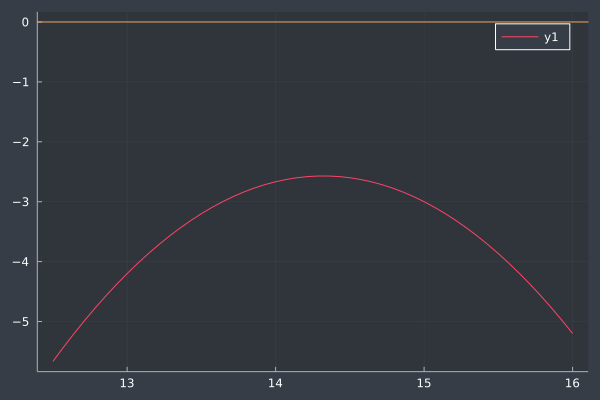

In [9]:
T(t) = coeffs_tempxtime[3]t^2 + coeffs_tempxtime[2]t + coeffs_tempxtime[1] # Funcao temperatura
f(x) = T(x) - 37 # Funcao que queremos encontrar a raiz

# Plot da funcao
x = range(12.5, 16, length=50)
plot(x, f.(x))
plot!([0], seriestype=:hline, label="")

No entanto temos um problema. Ao analisarmos o modelo, é possível perceber que essa função não tem raiz, ou seja, a temperatura do corpo nunca chegou a 37. Para isso há 2 opções:
1. O nosso modelo está falho
2. É um corpo falso que foi aquecido com o intuito de incriminar alguém

Vamos deixar o segundo caso para a polícia e aceitarmos o primeiro, que é a possibilidade do nosso modelo não representar bem a função que queremos. O problema do nosso modelo é que estamos aproximando o resfriamento do corpo usando polinômios, mas na realidade o que melhor aproxima é uma exponencial.

Podemos aceitar esse modelo e usar a aproximação de cerca de $34°$ para a temperatura de um corpo vivo, ou podemos modificar nosso modelo. Um polinômio contínuo a princípio terá um valor para todo $x$. Nosso polinômio nos dá a temperatura para um certo tempo. Se fizermos ao contrário, um tempo para uma certa temperatura, teremos assim um tempo correspondente a $37°$. 

Um modelo dessa forma poderia dar problema se o corpo ainda estivesse vivo, pois pela definição de função, seria o equivalente a cada temperatura ter acontecido em um único momento, impedindo de um corpo ter tido a mesma temperatura em momento diferentes. Mas no caso do resfriamento de um cadáver, isso não é um problema, pois como a temperatura só cai, não haverá repetições

In [10]:
coeffs_timextemp = interpolation(temperatures, time)

3-element Vector{Float64}:
  7.916666666666675
  0.8694444444444441
 -0.01944444444444444

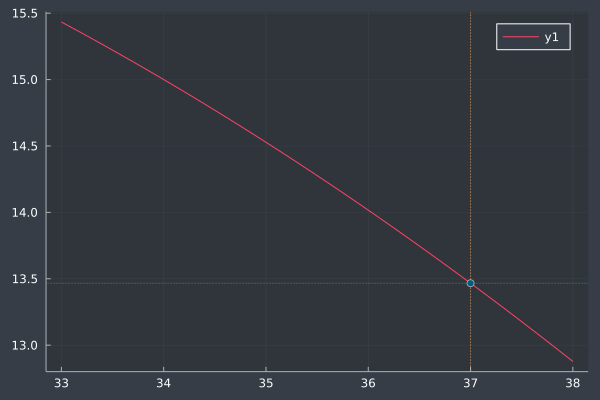

In [11]:
t(T) = coeffs_timextemp[3]T^2 + coeffs_timextemp[2]T + coeffs_timextemp[1] # Funcao tempo

x = range(33, 38, length=100)
plot(x, t.(x))
plot!([37], seriestype=:vline, linestyle=:dot, label="")
plot!([t(37)], seriestype=:hline, linestyle=:dot, label="")
plot!([37], [t(37)], seriestype=:scatter, label="")

In [12]:
death_time = t(37)
hour = trunc(Int, floor(death_time))
minutes = trunc(Int, floor((death_time - hour) * 60))
print(hour, "h", minutes, "m")

13h27m

Dessa forma conseguimos encontrar um tempo para a temperatura de 37, às 13h27m. Como a polícia chegou ao local às 15h e o corpo estava com 34°, esta é uma aproximação convincente

## Exercício 6 (1.6)

Para aproximar a função podemos usar a interpolação bilinear para 4 pontos. Esse método recebe os 2 vértices que formam um retângulo do domínio. A ideia é ter 4 argumentos na função, sendo para cada ponto um polinômio que dê o valor $1$ quando está no ponto correspondente e o valor $0$ quando estiver em outro extremo, assim como é feito no método de Lagrange.

In [13]:
points = [1, 3, 2, 4]
z = [800, 400, 600, 500]
coeffs_mountain = bilinear_interpolation(points, z)

4-element Vector{Float64}:
 1450.0
 -250.0
 -275.0
   75.0

Com os coeficientes, obtemos o polinômio $1450 - 250x - 275y + 75xy$. Para encontrar os pontos de máximo e mínimo é preciso fazer as derivadas parciais e ver os pontos em que são $0$

$$f_x(x, y) = -250 + 75y$$
$$f_y(x, y) = -275 + 75x$$

Igualando a 0, obtemos o seguinte ponto para o ponto crítico:

In [14]:
x0 = 275/75
y0 = 250/75
coeffs_mountain[1] + coeffs_mountain[2]*x0 + coeffs_mountain[3]*y0 + coeffs_mountain[4]*x0*y0

533.3333333333334

Encontramos um ponto crítico no meio da função, mas podemos facilmente ver que ele não é máximo nem mínimo global. Além de vermos os pontos críticos é preciso ver os limites do intervalo, os valores que temos são: $800$, $400$, $500$, $600$ e $533.33$

Dessa forma, o ponto de máximo dessa função é $(1, 2)$ com valor $800$ e o ponto de mínimo é $(1, 4)$ com valor $400$

## Exercício 7 (1.7)

Queremos realizar a interpolação por partes usando cúbicas em 5 pontos, isso implica nas seguintes definições:
1. Os 5 pontos serão os pares $(x_1, y_1)$, ..., $(x_5, y_5)$
2. $P(x)$ é a cúbica que passa pelos pontos $\{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}$
3. $Q(x)$ é a cúbica que passa pelos pontos $\{(x_3, y_3), (x_4, y_4), (x_5, y_5)\}$
4. $P(x) = c_1 + c_2x + c_3x^2 + c_4x^3$
5. $Q(x) = d_1 + d_2x + d_3x^2 + d_4x^3$

Agora que temos esse formalismo para nos ajudar, podemos realizar uma mudança na interpolação para que essas duas cúbicas sejam interpoladas nos pontos da forma descrita. As equações que devem ser satisfeitas são as seguintes:
* $P(x_1) = y_1 \rightarrow c_1 + c_2x_1 + c_3x_1^2 + c_4x_1^3 = y_1$
* $P(x_2) = y_2 \rightarrow c_1 + c_2x_2 + c_3x_2^2 + c_4x_2^3 = y_2$
* $P(x_3) = y_3 \rightarrow c_1 + c_2x_3 + c_3x_3^2 + c_4x_3^3 = y_3$
* $Q(x_3) = y_3 \rightarrow d_1 + d_2x_3 + d_3x_3^2 + d_4x_3^3 = y_3$
* $Q(x_4) = y_4 \rightarrow d_1 + d_2x_4 + d_3x_4^2 + d_4x_4^3 = y_4$
* $Q(x_5) = y_5 \rightarrow d_1 + d_2x_5 + d_3x_5^2 + d_4x_5^3 = y_5$
* $P'(x_3) = Q'(x_3) \rightarrow c_2 + 2c_3x_3 + 3c_4x_3^2 = d_2 + 2d_3x_3 + 3d_4x_3^2$
* $P''(x_3) = Q''(x_3) \rightarrow 2c_3 + 6c_4x_3 = 2d_3 + 6d_4x_3$

Com essas equações, podemos montar um sistema com matrizes, possuindo o seguinte formato:
$ \begin{bmatrix}
1  & x_1 & x_1^2 & x_1^3 & 0 & 0 & 0 & 0 \\
1  & x_2 & x_2^2 & x_2^3 & 0 & 0 & 0 & 0 \\
1  & x_3 & x_3^2 & x_3^3 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & x_3 & x_3^2 & x_3^3 \\
0 & 0 & 0 & 0 & 1 & x_4 & x_4^2 & x_4^3 \\
0 & 0 & 0 & 0 & 1 & x_5 & x_5^2 & x_5^3 \\
0 & 1 & 2x_3 & 3x_3^2 & 0 & -1 & -2x_3 & -3x_3^2 \\
0 & 0 & 2 & 6x_3 & 0 & 0 & -2 & -6x_3
\end{bmatrix}  
\begin{bmatrix}
c_1 \\
c_2 \\
c_3 \\
c_4 \\
d_1 \\
d_2 \\
d_3 \\
d_4 \\
\end{bmatrix} =   
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
y_3 \\
y_4 \\
y_5 \\
0 \\
0 \\
\end{bmatrix}$

Resolvendo esse sistema, encontraremos os coeficientes tanto de $P(x)$ quanto de $Q(x)$, e assim, encontraremos as duas cúbicas:

In [15]:
# Os 5 pontos a serem interpolados
x = [0,1,2,3,4]
y = [0,1,0,2,0]

# Lista dos coeficientes c_i e d_i das funcoes
c, d = spline_interpolation(x, y)

([0.0, 4.666666666666657, -4.999999999999993, 1.3333333333333321], [23.999999999999986, -31.33333333333333, 13.0, -1.6666666666666667])

Agora precisamos plotar as funções, para isso podemos fazer um código similar ao feito na última lista

In [16]:
P(x) = c[1] + c[2]x + c[3]x^2 + c[4]x^3
Q(x) = d[1] + d[2]x + d[3]x^2 + d[4]x^3;

In [17]:
px = range(x[1], x[3], length=100)
qx = range(x[3], x[5], length=100)
py = P.(px)
qy = Q.(qx)
;

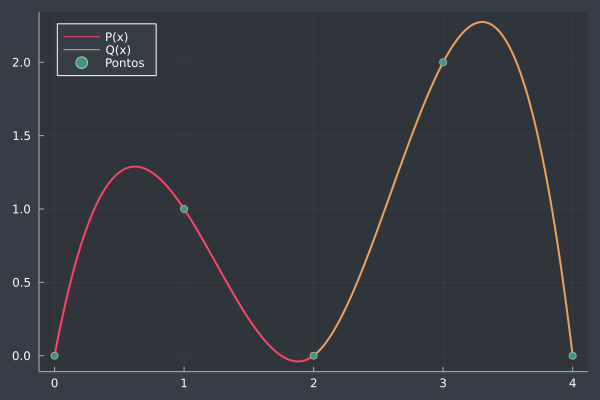

In [18]:
plot(px, py, label="P(x)", legend=:topleft, lw=2)
plot!(qx, qy, label="Q(x)", lw=2)
plot!(x, y, label="Pontos", seriestype = :scatter)